### 데이터
- 서울특별시 코로나19 확진자 발생동향  
    - 출처: http://data.seoul.go.kr/dataList/OA-20461/S/1/datasetView.do  
    - 기간: 2020.02.05~ 2021.08.11  
    
    
- 서울특별시 코로나19 자치구별 확진자 발생동향
    - http://data.seoul.go.kr/dataList/OA-20470/S/1/datasetView.do
    - 기간: 2020.02.28 ~ 2021.08.11  

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [2]:
df_covid19 = pd.read_csv('data/서울특별시 코로나19 확진자 발생동향_김현화.csv', encoding='CP949').iloc[:, :-8] # 필요 없는 컬럼 제외 

In [3]:
df_covid19.head()

,서울시 기준일,서울시 확진자,서울시 추가 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 사망,서울시 의심환자 전체,서울시 의심환자 검사중,서울시 의심환자 검사결과(음성),전국 기준일,전국 확진,전국 추가 확진,전국 치료중,전국 퇴원,전국 사망
0,2021.08.11.00,69306,661,8236,60524,606,546,NaN,NaN,NaN,2021.08.11.00,216206,2223,24565,189506,2135
1,2021.08.10.00,68646,360,8183,59918,456,545,NaN,NaN,NaN,2021.08.10.00,213987,1540,24330,187523,2134
2,2021.08.09.00,68287,415,8282,59462,454,543,NaN,NaN,NaN,2021.08.09.00,212448,1492,24081,186242,2125
3,2021.08.08.00,67872,450,8322,59008,324,542,NaN,NaN,NaN,2021.08.08.00,210956,1729,23832,185003,2121
4,2021.08.07.00,67422,503,8198,58684,663,540,NaN,NaN,NaN,2021.08.07.00,209228,1823,23323,183789,2116


In [4]:
df_covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   서울시 기준일            555 non-null    object 
 1   서울시 확진자            555 non-null    int64  
 2   서울시 추가 확진          555 non-null    int64  
 3   서울시 치료중            555 non-null    int64  
 4   서울시 퇴원             555 non-null    int64  
 5   서울시 추가 퇴원          555 non-null    int64  
 6   서울시 사망             555 non-null    int64  
 7   서울시 의심환자 전체        187 non-null    float64
 8   서울시 의심환자 검사중       188 non-null    float64
 9   서울시 의심환자 검사결과(음성)  188 non-null    float64
 10  전국 기준일             555 non-null    object 
 11  전국 확진              555 non-null    int64  
 12  전국 추가 확진           555 non-null    int64  
 13  전국 치료중             555 non-null    int64  
 14  전국 퇴원              555 non-null    int64  
 15  전국 사망              555 non-null    int64  
dtypes: float64(3), int64(11), 

In [5]:
df_covid19['서울시 기준일'] # 기간 확인: 2020.02.05~ 현재까지 매일 갱신되는 데이터

0      2021.08.11.00
1      2021.08.10.00
2      2021.08.09.00
3      2021.08.08.00
4      2021.08.07.00
           ...      
550    2020.02.09.18
551    2020.02.08.18
552    2020.02.07.18
553    2020.02.06.09
554    2020.02.05.15
Name: 서울시 기준일, Length: 555, dtype: object

In [6]:
# 필요한 컬럼만 추출
df_covid19 = df_covid19[['서울시 기준일', '서울시 확진자', '전국 확진']]
df_covid19.head()

,서울시 기준일,서울시 확진자,전국 확진
0,2021.08.11.00,69306,216206
1,2021.08.10.00,68646,213987
2,2021.08.09.00,68287,212448
3,2021.08.08.00,67872,210956
4,2021.08.07.00,67422,209228


In [7]:
# '서울시 기준일'을 인덱스로 설정
df_covid19.set_index("서울시 기준일", inplace = True)

# 인덱스 데이터 타입 변경
df_covid19.index = pd.to_datetime(df_covid19.index)

In [8]:
df_covid19 = df_covid19.sort_index() # 인덱스 정렬
df_covid19.head()

,서울시 확진자,전국 확진
서울시 기준일,,
2020-02-05 15:00:00,8,18
2020-02-06 09:00:00,11,24
2020-02-07 18:00:00,10,24
2020-02-08 18:00:00,10,24
2020-02-09 18:00:00,10,27


In [9]:
df_covid19.describe()

,서울시 확진자,전국 확진
count,555.000000,555.000000
mean,17613.809009,59992.945946
std,19366.429612,57666.022525
min,8.000000,18.000000
25%,1227.000000,12461.000000
50%,6326.000000,27427.000000
75%,31422.500000,101022.500000
max,69306.000000,216206.000000


In [10]:
# 서울/전국 신규 확진자 컬럼 추가
df_covid19[['서울 신규', '전국 신규']] = df_covid19[['서울시 확진자', '전국 확진']].diff()
df_covid19

,서울시 확진자,전국 확진,서울 신규,전국 신규
서울시 기준일,,,,
2020-02-05 15:00:00,8,18,NaN,NaN
2020-02-06 09:00:00,11,24,3.0,6.0
2020-02-07 18:00:00,10,24,-1.0,0.0
2020-02-08 18:00:00,10,24,0.0,0.0
2020-02-09 18:00:00,10,27,0.0,3.0
...,...,...,...,...
2021-08-07 00:00:00,67422,209228,503.0,1822.0
2021-08-08 00:00:00,67872,210956,450.0,1728.0
2021-08-09 00:00:00,68287,212448,415.0,1492.0


### 1. 전국 신규/누적 코로나 확진자 추이 

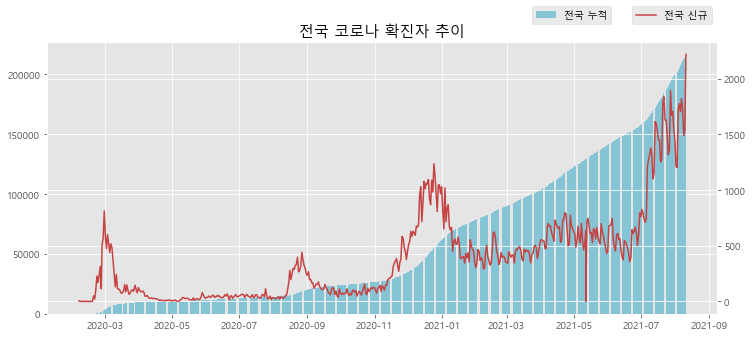

In [11]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.bar(df_covid19.index, df_covid19['전국 확진'], label='전국 누적', color='#85C4D5') 

ax2.plot(df_covid19.index, df_covid19['전국 신규'], label='전국 신규', color='#C54343')


ax1.set_title('전국 코로나 확진자 추이', fontsize=15) 

plt.legend()
ax1.legend(bbox_to_anchor =(0.85, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

plt.show()

### 2. 서울 신규/누적 코로나 확진자 추이

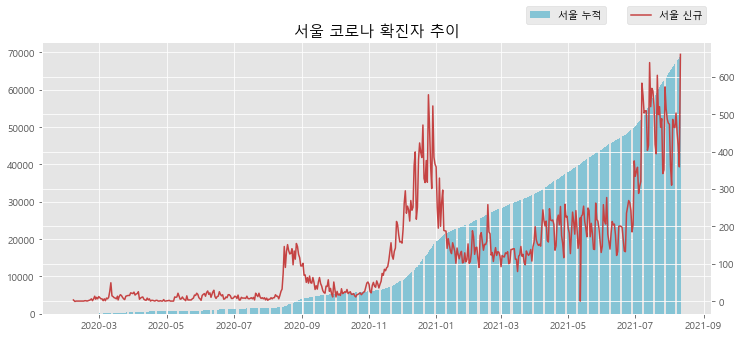

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.bar(df_covid19.index, df_covid19['서울시 확진자'], label='서울 누적', color='#85C4D5') 

ax2.plot(df_covid19.index, df_covid19['서울 신규'], label='서울 신규', color='#C54343')


ax1.set_title('서울 코로나 확진자 추이', fontsize=15) 


plt.legend()
ax1.legend(bbox_to_anchor =(0.85, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

plt.show()

### 3. 전국/서울 코로나 누적 확진자 추이

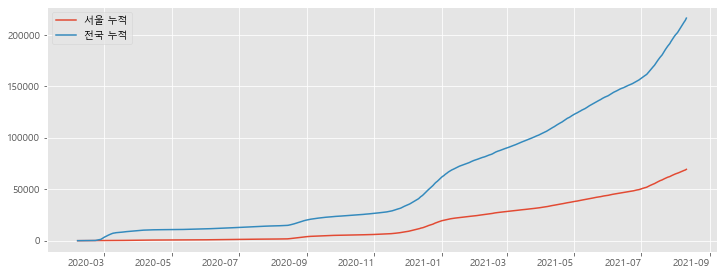

In [13]:
df_covid19[['서울시 확진자', '전국 확진']].plot(kind='line', rot=0)
plt.xlabel('')
plt.legend(['서울 누적', '전국 누적'])
plt.show()

### 4. 전국/서울 코로나 신규 확진자 추이

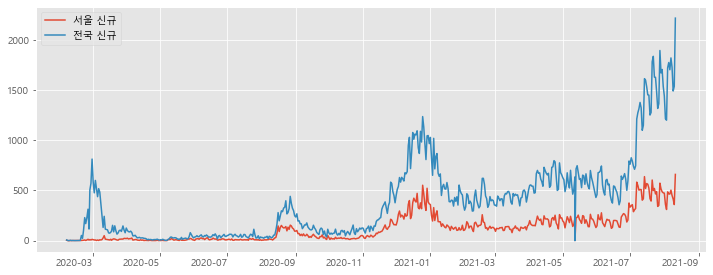

In [14]:
df_covid19[['서울 신규', '전국 신규']].plot(kind='line', rot=0)
plt.xlabel('')
plt.legend(['서울 신규', '전국 신규'])
plt.show()

### 5. 2020.02~2020.05 전국/서울 코로나 누적 확진자 추이

In [15]:
df_covid19 = df_covid19.reset_index(drop=False)
print(df_covid19.index[df_covid19['서울시 기준일'] == '2020-05-31 10:00:00'].tolist())

[116]


In [16]:
df_covid19_1 = df_covid19.iloc[0:117, :]
df_covid19_1.tail()

,서울시 기준일,서울시 확진자,전국 확진,서울 신규,전국 신규
112,2020-05-27 10:00:00,807,11265,15.0,40.0
113,2020-05-28 10:00:00,828,11344,21.0,79.0
114,2020-05-29 10:00:00,846,11402,18.0,58.0
115,2020-05-30 10:00:00,855,11441,9.0,39.0
116,2020-05-31 10:00:00,861,11468,6.0,27.0


In [17]:
df_covid19_1.describe()

,서울시 확진자,전국 확진,서울 신규,전국 신규
count,117.000000,117.000000,116.000000,116.000000
mean,416.051282,7801.401709,7.353448,98.706897
std,283.169830,4132.259622,7.809976,156.907118
min,8.000000,18.000000,-1.000000,0.000000
25%,105.000000,5766.000000,1.000000,11.750000
50%,513.000000,10062.000000,6.000000,31.000000
75%,635.000000,10780.000000,11.250000,100.250000
max,861.000000,11468.000000,49.000000,813.000000


In [18]:
# '서울시 기준일'을 인덱스로 재설정
df_covid19_1.set_index("서울시 기준일", inplace = True)
df_covid19_1.tail()

,서울시 확진자,전국 확진,서울 신규,전국 신규
서울시 기준일,,,,
2020-05-27 10:00:00,807,11265,15.0,40.0
2020-05-28 10:00:00,828,11344,21.0,79.0
2020-05-29 10:00:00,846,11402,18.0,58.0
2020-05-30 10:00:00,855,11441,9.0,39.0
2020-05-31 10:00:00,861,11468,6.0,27.0


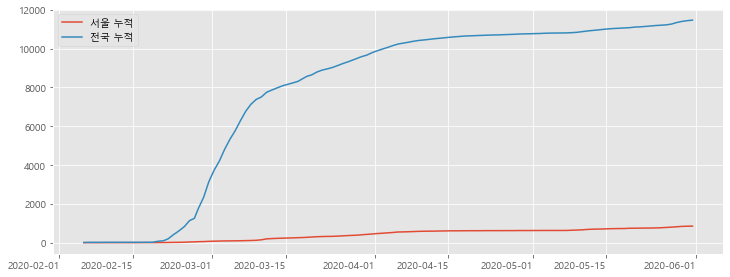

In [19]:
df_covid19_1[['서울시 확진자', '전국 확진']].plot(kind='line', rot=0)
plt.xlabel('')
plt.legend(['서울 누적', '전국 누적'])
plt.show()

=> 서울 그래프가 잘 보이지 않아서 따로 확인

### 6. 2020.02~2020.05 서울 코로나 누적 확진자 추이

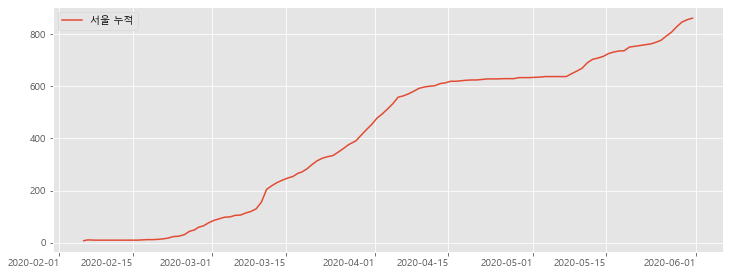

In [20]:
df_covid19_1[['서울시 확진자']].plot(kind='line', rot=0)
plt.xlabel('')
plt.legend(['서울 누적'])
plt.show()

### 7. 2020.02~2020.05 전국/서울 코로나 신규 확진자 추이

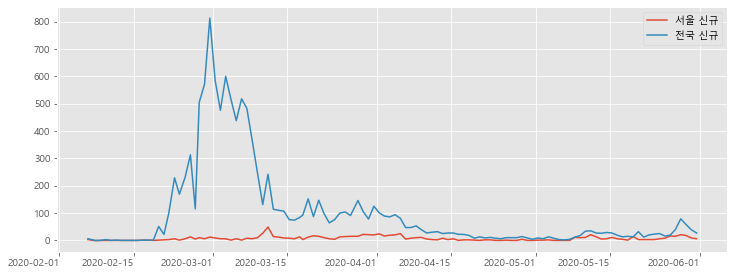

In [21]:
df_covid19_1[['서울 신규', '전국 신규']].plot(kind='line', rot=0)
plt.xlabel('')
plt.legend(['서울 신규', '전국 신규'])
plt.show()

=> 서울 그래프만 따로 확인

### 8. 2020.02~2020.05 서울 코로나 신규 확진자 추이

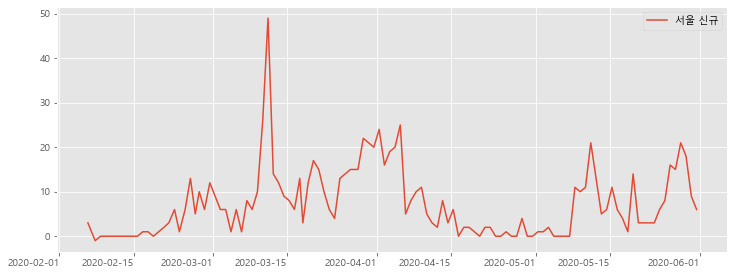

In [22]:
df_covid19_1[['서울 신규']].plot(kind='line', rot=0)
plt.xlabel('')
plt.legend(['서울 신규'])
plt.show()

In [23]:
df_covid19_gu = pd.read_csv('data/서울특별시 코로나19 자치구별 확진자 발생동향_김현화.csv', encoding='CP949').iloc[:-23, :-3] # 필요 없는 행, 컬럼 제외 

In [24]:
df_covid19_gu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 51 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구 기준일  532 non-null    object 
 1   종로구 전체   532 non-null    float64
 2   종로구 추가   532 non-null    float64
 3   중구 전체    532 non-null    float64
 4   중구 추가    532 non-null    float64
 5   용산구 전체   532 non-null    float64
 6   용산구 추가   532 non-null    float64
 7   성동구 전체   532 non-null    float64
 8   성동구 추가   532 non-null    float64
 9   광진구 전체   532 non-null    float64
 10  광진구 추가   532 non-null    float64
 11  동대문구 전체  532 non-null    float64
 12  동대문구 추가  532 non-null    float64
 13  중랑구 전체   532 non-null    float64
 14  중랑구 추가   532 non-null    float64
 15  성북구 전체   532 non-null    float64
 16  성북구 추가   532 non-null    float64
 17  강북구 전체   532 non-null    float64
 18  강북구 추가   532 non-null    float64
 19  도봉구 전체   532 non-null    float64
 20  도봉구 추가   532 non-null    float64
 21  노원구 전체   532 non

In [25]:
df_covid19_gu.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가
0,2021.08.11.00,1103.0,13.0,1038.0,14.0,2067.0,27.0,2014.0,8.0,2271.0,...,3752.0,47.0,3210.0,44.0,4858.0,54.0,4179.0,48.0,2701.0,20.0
1,2021.08.10.00,1090.0,9.0,1024.0,6.0,2040.0,12.0,2006.0,7.0,2249.0,...,3705.0,19.0,3166.0,17.0,4804.0,28.0,4131.0,40.0,2681.0,15.0
2,2021.08.09.00,1080.0,10.0,1021.0,4.0,2028.0,10.0,1999.0,11.0,2239.0,...,3685.0,23.0,3149.0,19.0,4776.0,30.0,4091.0,36.0,2666.0,12.0
3,2021.08.08.00,1070.0,8.0,1017.0,14.0,2018.0,7.0,1988.0,15.0,2230.0,...,3662.0,39.0,3130.0,18.0,4745.0,33.0,4054.0,31.0,2654.0,12.0
4,2021.08.07.00,1062.0,3.0,1004.0,11.0,2012.0,19.0,1973.0,3.0,2224.0,...,3623.0,34.0,3112.0,23.0,4712.0,41.0,4023.0,36.0,2642.0,22.0


In [26]:
df_covid19_gu['자치구 기준일'] # 기간 확인: 2020.02.28~ 현재까지 매일 갱신되는 데이터

0      2021.08.11.00
1      2021.08.10.00
2      2021.08.09.00
3      2021.08.08.00
4      2021.08.07.00
           ...      
527    2020.03.03.10
528    2020.03.02.10
529    2020.03.01.10
530    2020.02.29.10
531    2020.02.28.10
Name: 자치구 기준일, Length: 532, dtype: object

In [27]:
df_covid19_gu.head()

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가
0,2021.08.11.00,1103.0,13.0,1038.0,14.0,2067.0,27.0,2014.0,8.0,2271.0,...,3752.0,47.0,3210.0,44.0,4858.0,54.0,4179.0,48.0,2701.0,20.0
1,2021.08.10.00,1090.0,9.0,1024.0,6.0,2040.0,12.0,2006.0,7.0,2249.0,...,3705.0,19.0,3166.0,17.0,4804.0,28.0,4131.0,40.0,2681.0,15.0
2,2021.08.09.00,1080.0,10.0,1021.0,4.0,2028.0,10.0,1999.0,11.0,2239.0,...,3685.0,23.0,3149.0,19.0,4776.0,30.0,4091.0,36.0,2666.0,12.0
3,2021.08.08.00,1070.0,8.0,1017.0,14.0,2018.0,7.0,1988.0,15.0,2230.0,...,3662.0,39.0,3130.0,18.0,4745.0,33.0,4054.0,31.0,2654.0,12.0
4,2021.08.07.00,1062.0,3.0,1004.0,11.0,2012.0,19.0,1973.0,3.0,2224.0,...,3623.0,34.0,3112.0,23.0,4712.0,41.0,4023.0,36.0,2642.0,22.0


In [28]:
# '자치구 기준일'을 인덱스로 설정
df_covid19_gu.set_index('자치구 기준일', inplace = True)
# 인덱스 데이터 타입 변경
df_covid19_gu.index = pd.to_datetime(df_covid19_gu.index)
# 인덱스 정렬
df_covid19_gu = df_covid19_gu.sort_index()
df_covid19_gu.head()

,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,광진구 추가,...,관악구 전체,관악구 추가,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가
자치구 기준일,,,,,,,,,,,,,,,,,,,,,
2020-02-28 10:00:00,11.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,...,2.0,0.0,4.0,1.0,3.0,1.0,9.0,0.0,3.0,0.0
2020-02-29 10:00:00,11.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,0.0,...,3.0,1.0,4.0,0.0,6.0,3.0,12.0,3.0,4.0,1.0
2020-03-01 10:00:00,11.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,...,4.0,1.0,4.0,0.0,7.0,1.0,12.0,0.0,4.0,0.0
2020-03-02 10:00:00,11.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,...,4.0,0.0,4.0,0.0,8.0,1.0,12.0,0.0,4.0,0.0
2020-03-03 10:00:00,11.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,4.0,0.0,5.0,1.0,9.0,1.0,12.0,0.0,4.0,0.0


In [29]:
# 필요한 컬럼만 추출
df_gwanak = df_covid19_gu[['관악구 전체', '관악구 추가']]
df_gwanak.head()

,관악구 전체,관악구 추가
자치구 기준일,,
2020-02-28 10:00:00,2.0,0.0
2020-02-29 10:00:00,3.0,1.0
2020-03-01 10:00:00,4.0,1.0
2020-03-02 10:00:00,4.0,0.0
2020-03-03 10:00:00,4.0,0.0


In [30]:
df_gwanak.describe()

,관악구 전체,관악구 추가
count,532.000000,532.000000
mean,922.973684,7.105263
std,921.002847,10.397749
min,2.000000,0.000000
25%,131.000000,1.000000
50%,496.500000,4.000000
75%,1500.750000,8.000000
max,3752.000000,62.000000


In [31]:
df_gwanak_1 = df_gwanak.iloc[0:94, :]
df_gwanak_1.tail()

,관악구 전체,관악구 추가
자치구 기준일,,
2020-05-27 10:00:00,58.0,2.0
2020-05-28 10:00:00,59.0,1.0
2020-05-29 10:00:00,59.0,0.0
2020-05-30 10:00:00,59.0,0.0
2020-05-31 10:00:00,59.0,0.0


### 9. 2020.02~2020.05 관악구 신규/누적 코로나 확진자 추이

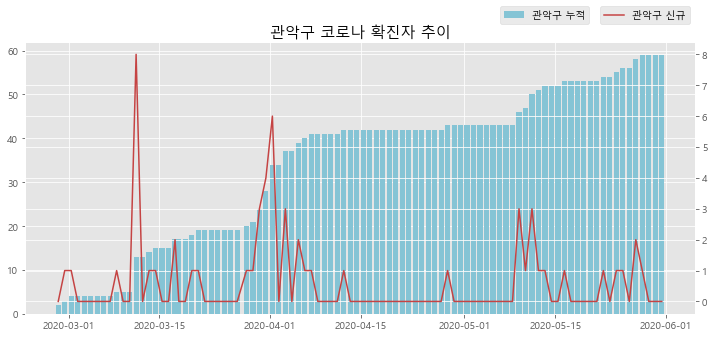

In [32]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.bar(df_gwanak_1.index, df_gwanak_1['관악구 전체'], label='관악구 누적', color='#85C4D5') 

ax2.plot(df_gwanak_1.index, df_gwanak_1['관악구 추가'], label='관악구 신규', color='#C54343')


ax1.set_title('관악구 코로나 확진자 추이', fontsize=15) 

plt.legend()
ax1.legend(bbox_to_anchor =(0.85, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

plt.show()

### 10. 2020.02~2020.05 서울시 구별 코로나 누적 확진자 수

In [33]:
print(df_covid19_gu.columns)
print(df_covid19_gu.shape)

Index(['종로구 전체', '종로구 추가', '중구 전체', '중구 추가', '용산구 전체', '용산구 추가', '성동구 전체',
       '성동구 추가', '광진구 전체', '광진구 추가', '동대문구 전체', '동대문구 추가', '중랑구 전체', '중랑구 추가',
       '성북구 전체', '성북구 추가', '강북구 전체', '강북구 추가', '도봉구 전체', '도봉구 추가', '노원구 전체',
       '노원구 추가', '은평구 전체', '은평구 추가', '서대문구 전체', '서대문구 추가', '마포구 전체', '마포구 추가',
       '양천구 전체', '양천구 추가', '강서구 전체', '강서구 추가', '구로구 전체', '구로구 추가', '금천구 전체',
       '금천구 추가', '영등포구 전체', '영등포구 추가', '동작구 전체', '동작구 추가', '관악구 전체', '관악구 추가',
       '서초구 전체', '서추구 추가', '강남구 전체', '강남구 추가', '송파구 전체', '송파구 추가', '강동구 전체',
       '강동구 추가'],
      dtype='object')
(532, 50)


In [34]:
gu_acc = df_covid19_gu[['종로구 전체', '중구 전체', '용산구 전체', '성동구 전체', '광진구 전체', '동대문구 전체', '중랑구 전체', 
                       '성북구 전체', '강북구 전체', '도봉구 전체', '노원구 전체', '은평구 전체', '서대문구 전체', '마포구 전체', 
                       '양천구 전체', '강서구 전체', '구로구 전체', '금천구 전체', '영등포구 전체', '동작구 전체', '관악구 전체',
                       '서초구 전체', '강남구 전체', '송파구 전체', '강동구 전체']]

gu_acc.columns = gu_acc.columns.str.replace('전체', '') # 컬럼명에서 '전체' 삭제
gu_acc.head()

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구 기준일,,,,,,,,,,,,,,,,,,,,,
2020-02-28 10:00:00,11.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,2.0,4.0,3.0,9.0,3.0
2020-02-29 10:00:00,11.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,3.0,4.0,6.0,12.0,4.0
2020-03-01 10:00:00,11.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,4.0,4.0,7.0,12.0,4.0
2020-03-02 10:00:00,11.0,0.0,0.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,4.0,4.0,8.0,12.0,4.0
2020-03-03 10:00:00,11.0,0.0,0.0,3.0,2.0,1.0,1.0,5.0,0.0,1.0,...,2.0,1.0,1.0,3.0,1.0,4.0,5.0,9.0,12.0,4.0


In [35]:
gu_acc_1 = gu_acc.iloc[0:94, :]
gu_acc_1

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구 기준일,,,,,,,,,,,,,,,,,,,,,
2020-02-28 10:00:00,11.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,2.0,4.0,3.0,9.0,3.0
2020-02-29 10:00:00,11.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,3.0,4.0,6.0,12.0,4.0
2020-03-01 10:00:00,11.0,0.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,...,2.0,1.0,1.0,1.0,1.0,4.0,4.0,7.0,12.0,4.0
2020-03-02 10:00:00,11.0,0.0,0.0,3.0,2.0,1.0,1.0,3.0,0.0,0.0,...,2.0,1.0,1.0,2.0,1.0,4.0,4.0,8.0,12.0,4.0
2020-03-03 10:00:00,11.0,0.0,0.0,3.0,2.0,1.0,1.0,5.0,0.0,1.0,...,2.0,1.0,1.0,3.0,1.0,4.0,5.0,9.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-27 10:00:00,18.0,8.0,38.0,34.0,13.0,34.0,19.0,28.0,12.0,18.0,...,36.0,38.0,14.0,28.0,38.0,58.0,42.0,72.0,45.0,23.0
2020-05-28 10:00:00,18.0,8.0,38.0,37.0,14.0,34.0,19.0,28.0,13.0,18.0,...,39.0,41.0,14.0,29.0,39.0,59.0,42.0,72.0,46.0,24.0
2020-05-29 10:00:00,18.0,9.0,38.0,39.0,14.0,34.0,19.0,28.0,14.0,18.0,...,43.0,41.0,15.0,31.0,40.0,59.0,42.0,72.0,47.0,24.0


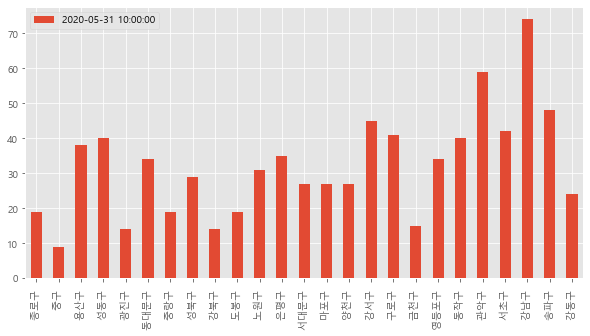

In [36]:
gu_acc_1.iloc[-1, :].plot(kind='bar', figsize=(10, 5), rot=90) # 5월까지 구별 누적 확진자
plt.legend(loc='best')
plt.show()

### 11. 2020.02~2020.05 서울시 구별 코로나 누적 확진자 Top5

In [37]:
gu_acc_top5 = gu_acc_1.iloc[-1, :].sort_values(ascending=False).head().to_frame()
gu_acc_top5 

,2020-05-31 10:00:00
강남구,74.0
관악구,59.0
송파구,48.0
강서구,45.0
서초구,42.0


In [38]:
gu_acc_1.iloc[-1, :].sum()

804.0

In [39]:
# 컬럼명 변경
gu_acc_top5.columns = ['20년5월누적']

# 기타 행 추가
gu_acc_top5.loc['기타'] = gu_acc_1.iloc[-1, :].sum() - gu_acc_top5['20년5월누적'].sum()

# 비율 컬럼 추가
gu_acc_top5['비율'] = ((gu_acc_top5['20년5월누적']/gu_acc_1.iloc[-1, :].sum())*100).round(1)
gu_acc_top5

,20년5월누적,비율
강남구,74.0,9.2
관악구,59.0,7.3
송파구,48.0,6.0
강서구,45.0,5.6
서초구,42.0,5.2
기타,536.0,66.7


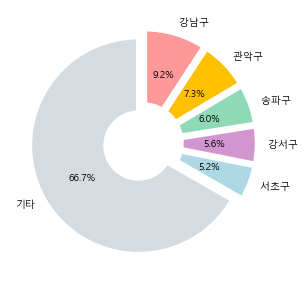

In [40]:
labels = gu_acc_top5.index.tolist() # 인덱스 리스트로 추출

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(gu_acc_top5['비율'].tolist(), labels=labels, autopct='%.1f%%', startangle=90, counterclock=False, 
        explode=explode, colors=colors, wedgeprops=wedgeprops)
# plt.title('<2020년>', fontsize=13)
plt.show()